____
__Universidad Tecnológica Nacional, Buenos Aires__<br/>
__Ingeniería Industrial__<br/>
__Cátedra de Ciencia de Datos - Curso I5521 - Turno sabado mañana__<br/>
__Elaborado por: Nicolas Aguirre__
____

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

In [ ]:
DRIVE_FOLDER = 'ClusterAI2020/'
CLASS_FOLDER = 'clase_02/'
DATA_PATH = "../data/clase_02/"
%cd {'/gdrive/My Drive/'+DRIVE_FOLDER+CLASS_FOLDER}

# clase_02: EDA : Analisis Exploratorio de los Datos

## Librerias

In [ ]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset

El dataset  que usaremos se encuentra en:
  
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

* Descargar e importarlo


* Verificar que se haya cargado bien el dataset


* Dimension del dataset

In [ ]:
df = pd.read_csv(DATA_PATH+'clusterai_2020_clase02_dataset_ny_airbnb.csv',index_col="id")

NameError: ignored

In [ ]:
print(f'Shape: {np.shape(df)}')
df.head(3)

# Limpieza

* Duplicados


* Cantidad y % de NaN por columna


* Luego de quitarlos, devolver shape del df

In [ ]:
df.drop_duplicates(inplace=True,keep='first')

In [ ]:
cant_NaN = df.isnull().sum()
print(cant_NaN,'\r\n')

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64 



In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000


In [ ]:
#Limpiamos registros
df.dropna(how ='any', inplace = True)

In [ ]:
# Verificamos como quedo el data-set
print(f'Nos quedamos con un df de {df.shape[0]} filas x{df.shape[1]} columnas')

Nos quedamos con un df de 38821 filas x15 columnas


# Practica!

* Crear columna 'log_precios'. Grafico de la distribucion de precio y de log(precio)


* En base al que mejor se ajuste, comparar los precios segun los distintos "neighbourhood_group" (boxplot)


* Mediana, Limite inferior y superior del 'neighbourhood_group' con mayor y menor precio.


* Crear una nueva columa llamada "Banda", con 7 categorias de precios. 
        
    Bandas = [0, 50, 75, 100, 150, 200, 250]


* Boxplot de "Bandas" vs log(Reviews)


* Scatter plot de Longitud y Latitud donde se distinga "neighbourhood_group"


* Scatter plot de Longitud y Latitud donde se distingan las "Bandas"


* Cantidad de barrios



* Comparacion de la cantidad de hospedajes para los 10 barrios mas populares (barras)


* Cantidad de hospedajes para los 10 barrios mas populares, segregados por bandas (pivot_table)


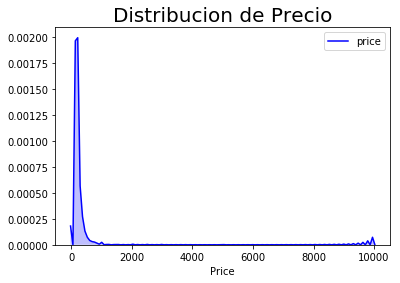

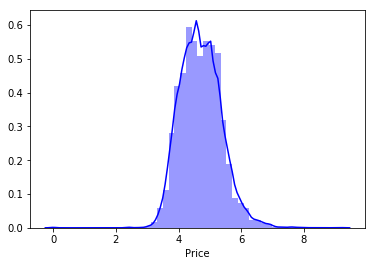

In [ ]:
#Columna log precios
df['log_price'] = np.log(1+df['price'])

#Plot Precio
sns.kdeplot(df.price, color="b", shade = True)
plt.xlabel("Price")
plt.title('Distribucion de Precio',size = 20)
plt.show()

#Plot Log-Precio
sns.distplot(np.log(1+df['price']),color='b')
plt.xlabel("Price")
plt.show()

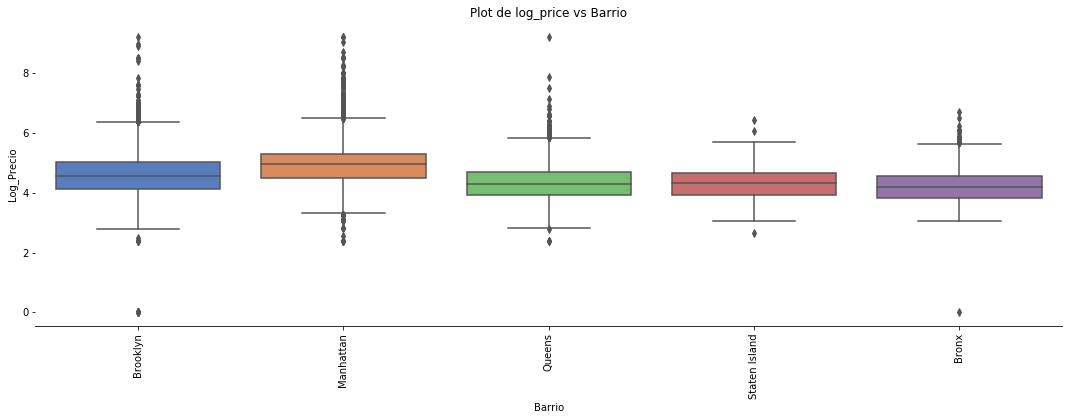

In [ ]:
#En base al que mejor se ajuste, comparar los precios segun los distintos "neighbourhood_group" (boxplot)
g = sns.catplot(x='neighbourhood_group',y='log_price',data=df, kind="box", height = 5 ,aspect=3,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
plt.xlabel("Barrio")
plt.ylabel("Log_Precio")
plt.title('Plot de log_price vs Barrio',size = 12)
plt.show()

Mediana:
 4.948759890378168

Limites Inferiores :
4.51085950651685

Limites Superiores:
6.486160788944089

Mediana:
 4.189654742026425

Limites Inferiores :
3.828641396489095

Limites Superiores:
5.638354669333745



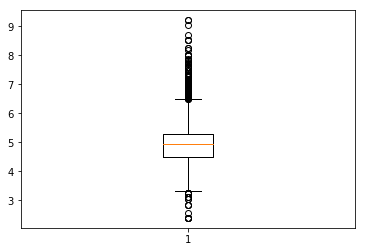

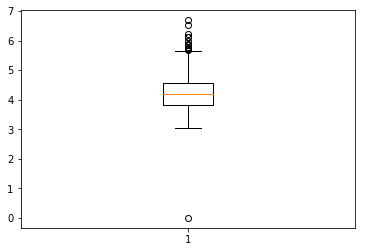

In [ ]:
# Mediana, Limite inferior y superior del 'neighbourhood_group' con mayor y menor precio.

grup1 = 'Manhattan'
df_pivot= df[df['neighbourhood_group']==grup1]
plt.figure()
A = plt.boxplot(df_pivot['log_price'])
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
#print(f'Valores outliers:\r\n{outliers[0]}\r\n')
print(f'Mediana:\r\n {medians[0][0]}\r\n')
print(f'Limites Inferiores :\r\n{whiskers[0][0]}\r\n')
print(f'Limites Superiores:\r\n{whiskers[1][1]}\r\n')

grup2 = 'Bronx'
df_pivot= df[df['neighbourhood_group']==grup2]
plt.figure()
A = plt.boxplot(df_pivot['log_price'])
medians = [median.get_ydata() for median in A["medians"]]
#whiskers
whiskers = [whiskers.get_ydata() for whiskers in A["whiskers"]]
#print(f'Valores outliers:\r\n{outliers[0]}\r\n')
print(f'Mediana:\r\n {medians[0][0]}\r\n')
print(f'Limites Inferiores :\r\n{whiskers[0][0]}\r\n')
print(f'Limites Superiores:\r\n{whiskers[1][1]}\r\n')

In [ ]:
#Definimos y creamos las bandas:

df.loc[(df['price'] > 0) & (df['price'] <= 50), 'Banda'] = 1
df.loc[(df['price'] > 50) & (df['price'] <= 75), 'Banda']   = 2
df.loc[(df['price'] > 75) & (df['price'] <= 100), 'Banda']   = 3
df.loc[(df['price'] > 100) & (df['price'] <= 150), 'Banda']   = 4
df.loc[(df['price'] > 150) & (df['price'] <= 200), 'Banda']   = 5
df.loc[(df['price'] > 200) & (df['price'] <= 250), 'Banda']   = 6
df.loc[(df['price'] > 250), 'Banda']  = 7

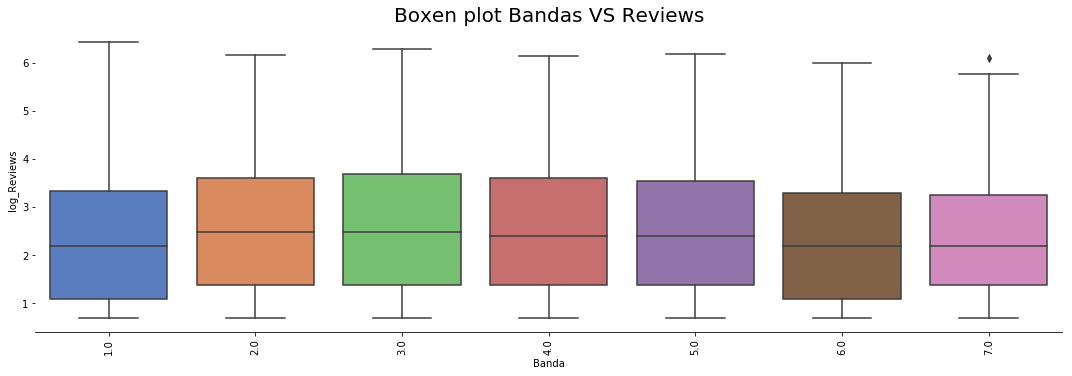

In [ ]:
#Boxplot de "Bandas" vs log(Reviews)
df['log_review'] = np.log(1+df['number_of_reviews'])

g = sns.catplot(x="Banda",y='log_review',data=df, kind="box", height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("log_Reviews")
plt.title('Boxen plot Bandas VS Reviews',size = 20)
plt.show()

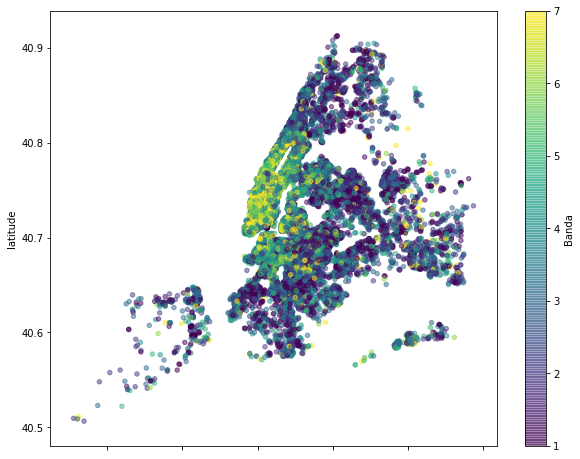

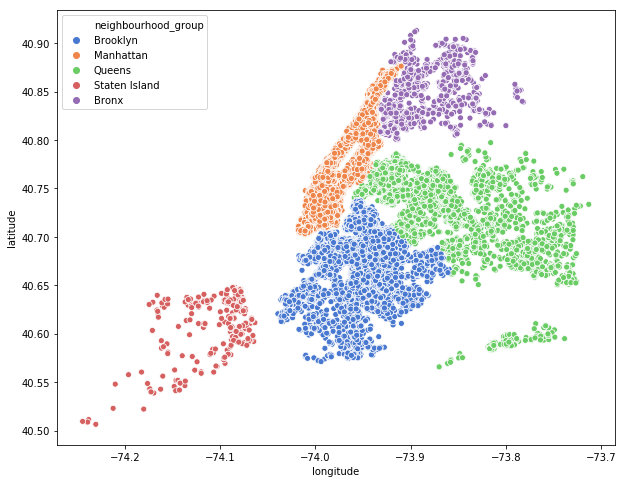

In [ ]:
df.plot(kind='scatter', x='longitude', y='latitude', c='Banda',
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(10,8))
plt.show()

plt.figure(figsize=(10,8))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group,palette='muted')
plt.show()

In [ ]:
q_barrios = len(df['neighbourhood'].unique())
print(f'En total hay {q_barrios} barrios\r\n')

En total hay 218 barrios



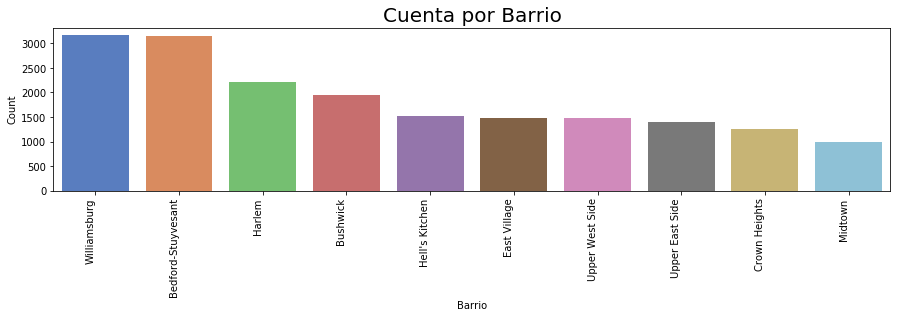

In [ ]:
top_neighbourhood = df['neighbourhood'].value_counts().index[0:10]


plt.figure(figsize=(15,3))
g = sns.countplot(x='neighbourhood',data=df, palette = "muted",order=top_neighbourhood)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel("Barrio")
plt.ylabel("Count")
plt.show()

In [ ]:
table = pd.pivot_table(df[df['neighbourhood'].isin(top_neighbourhood)],index='neighbourhood',columns = 'Banda', values='log_price' ,fill_value=0, aggfunc = 'count')
table

Banda,1.0,2.0,3.0,4.0,5.0,6.0,7.0
neighbourhood,,,,,,,
Bedford-Stuyvesant,662,804,563,651,290,73,94
Bushwick,610,609,312,240,95,39,34
Crown Heights,238,288,268,261,102,41,67
East Village,15,112,283,421,316,152,190
Harlem,251,595,518,446,208,69,117
Hell's Kitchen,12,128,226,397,352,153,260
Midtown,4,30,87,236,191,120,318
Upper East Side,30,84,233,519,281,115,143
Upper West Side,45,147,262,384,306,123,215
